<h1>Python Tool: Options

The provided options module provides a number of helpful python implementations of bedrock functions for working with options.  Import the module into an interactive python session by

In [1]:
import options as op

There are 2 distinct modes of use for the functionality in the options module.  You can use the base functions directly as an options calculator.  There is also an object based interface that is useful for more involved work and also provides visualization tools.  We will discuss each approach to using the module.

<h2>1 USE AS AN OPTION CALCULATOR:</h2>
The module provides a number of functions for evaluating Black-Scholes prices as well as the greeks.  These functions, together with their signatures are as follows:

<code>op.BSCall(spot, time, strike, expiry, vol, rate)
op.BSPut(spot, time, strike, expiry, vol, rate)
op.BSCall_Delta(spot, time, strike, expiry, vol, rate)
op.BSPut_Delta(spot, time, strike, expiry, vol, rate)
op.BSCall_Gamma(spot, time, strike, expiry, vol, rate)
op.BSPut_Gamma(spot, time, strike, expiry, vol, rate)
op.BSCall_Theta(spot, time, strike, expiry, vol, rate)
op.BSPut_Theta(spot, time, strike, expiry, vol, rate)
op.BSCall_Vega(spot, time, strike, expiry, vol, rate)
op.BSPut_Vega(spot, time, strike, expiry, vol, rate)</code>

The signature for all of the functions is the same.  Both vol (the volatility value) and rate (the interest rate) must be entered in as percentages.  The functions BSCall and BSPut calculate the Black-Scholes call and put prices respectively. The rest of these functions calculate Black-Scholes greeks, as per their labels.

As examples of the use of these functions, the call calculates the price of a call with a strike price of 40 and 1 year to expiry when the underlying spot price is 50, and with a 25% volatility and a 5% risk free interest rate.


In [2]:
call_price = op.BSCall(spot=50, time=0, strike=40, expiry=1, vol=25, rate=5)
print(call_price)

12.706255999157158


The function call calculates the theta for a put with a strike of $120 and expiring in 6 months with the spot price at 100 and with a volatility of 40% and a 9% risk free interest rate.

In [3]:
put_theta = op.BSPut_Theta(spot=100, time=0, strike=120, expiry=0.5, vol=40, rate=9)
print(put_theta)

-0.008356597550788847


The options module also provides an implied volatility solver.  The signature of this function is

<code>op.implied_vol(price, spot, strike, expiry, rate)</code>

As example of it's usage, the function call will return the implied volatility for a call option, currently trading at 40 per contract with a strike price of 120 and a time to expiry of 6 months when the spot price of the underlying is 100 and the risk free interest rate is 9%.

In [4]:
vol = op.implied_vol(price=40, spot=100, strike=120, expiry=0.5, rate=9)
print(vol)

164.1818964217018


Currently, the implied volatility function is only implemented for calls.  While this is not a serious limitation, since calls and puts imply the same volatility (this is a consequence of put-call parity) it is intended for this function to work for puts as well, but this is not available as of now.

__DEPENDENCY REMARK:__ Please note that this module requires scipy which is imported at the beginning of the script.  You must have this library loaded so that it can be imported into your Python platform.


<h2>2. OBJECT BASED USAGE:</h2>
The options module also defines a class allowing usage of option objects.  To instantiate a call option object, invoke the option class constructor:

In [5]:
call = op.option(strike=100, expiry=0.25, type='call')

so that call is a call object with a strike of $100 and expiring in 3 months.  One may similarly instantiate a put object:

In [6]:
put = op.option(strike=150, expiry=1/12, type='put')

defining put as a put object with a strike price of $150 expiring in 1 month.  Note that the option constructor defaults to a call if the type argument is not given, so for a call it is unnecessary to include the type argument at all.

Once option objects are available, they can be priced and the greeks can be calculated:

In [7]:
call.price(spot=90, time=0, vol=20, rate=5)

0.8975218205295548

returns the Black-Scholes price of the call when the spot price of the underlying asset is $90, at time 0 (So that the time to expiry is exactly the expiration date specified when the object was created), an implied volatility of 20% and a risk free interest rate of 5%.  To calculate the greeks for this option, using the same parameters, invoke the methods as follows:

In [8]:
call.delta(spot=90, time=0, vol=20, rate=5)

0.18980769945372383

In [9]:
call.gamma(spot=90, time=0, vol=20, rate=5)

0.030132931933738612

In [10]:
call.vega(spot=90, time=0, vol=20, rate=5)

0.12203837433164139

In [11]:
call.theta(spot=90, time=0, vol=20, rate=5)

-0.015591215150084754

The option objects provide many visualization methods.  Note that the payoff methods all require matplotlib to be available on your system. To plot the payoff of an option  invoke the plot_payoff method

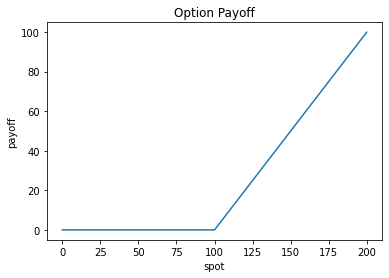

In [12]:
call.plot_payoff()

The Black-Scholes price, and all of the greeks, as functions of the spot price, may be plotted as follows:

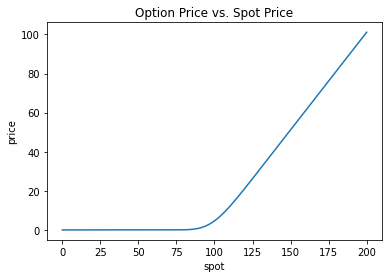

In [13]:
call.plot_price(time=0, vol=20, rate=5)

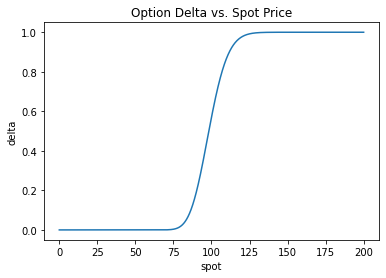

In [14]:
call.plot_delta(time=0, vol=20, rate=5)

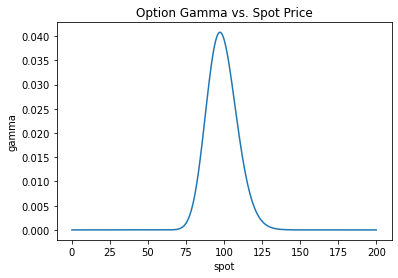

In [15]:
call.plot_gamma(time=0, vol=20, rate=5)

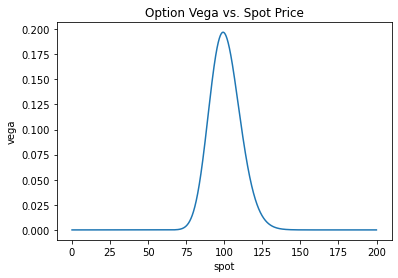

In [16]:
call.plot_vega(time=0, vol=20, rate=5)

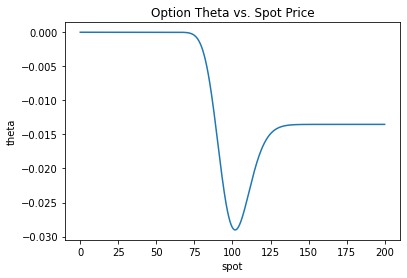

In [17]:
call.plot_theta(time=0, vol=20, rate=5)

<h2>EXAMPLES:</h2>
An excellent way to gain familiarity with the tools in this module is to check your numerical results from solving the homework problems (which you, of course, should work through manually first).  I'll consider a few variants on the those computations.

<h3>Example 1</h3>
We can start by checking our numbers for question 4 in problem set 10.  The problem was to calculate the delta, gamma, and vega of a 6 month call option with a strike price of 60 and a spot price of 72 and 20% volatility, and with a 4% risk free rate.  We can calculate these numbers using the options module as follows:

In [18]:
op.BSCall_Delta(72, 0, 60, 0.5, 20, 4)

0.9333661942407723

In [19]:
op.BSCall_Gamma(72, 0, 60, 0.5, 20, 4)

0.01269427421374818

In [20]:
op.BSCall_Vega(72, 0, 60, 0.5, 20, 4)

0.06580711752407059

In [21]:
op.BSCall_Theta(72, 0, 60, 0.5, 20, 4)

-0.00949074930488178

We can also calculate the option price:

In [22]:
op.BSCall(72, 0, 60, 0.5, 20, 4)

13.50283734032466

And we can also calculate all these same numbers for a put:

In [23]:
op.BSPut(72, 0, 60, 0.5, 20, 4)

0.3147577387299716

In [24]:
op.BSPut_Delta(72, 0, 60, 0.5, 20, 4)

-0.06663380575922775

In [25]:
op.BSPut_Gamma(72, 0, 60, 0.5, 20, 4)

0.01269427421374818

In [26]:
op.BSPut_Vega(72, 0, 60, 0.5, 20, 4)

0.06580711752407059

In [27]:
op.BSCall_Theta(72, 0, 60, 0.5, 20, 4)

-0.00949074930488178

<h3>Example 2</h3>
These tools allow us to deal with more realistic problems than we posed in the problem set where we confined ourselves to manual calculations.  Consider the exercise in delta hedging of an option position posed in question 5.  We supposed we held a long position in 50 calls expiring in 1 year and with strike of 105.  We supposed the underlying stock was trading at 110 with a volatility of 15%.  And we supposed a risk free rate of 4%.  To delta hedge, we compute

In [28]:
delta1 = op.BSCall_Delta(110, 0, 105, 1, 15, 4)

To delta hedge we would then take a short position in 50*delta1 shares of the underlying stock.  In a real trading situation a delta hedged position would be rebalanced at least once a day.  So now we'll suppose that on the next day the stock price has moved to 120.  We'll also suppose that the volatility has increased to 18%.  We would now calculate the P&L of our delta hedged position on the next day as

In [29]:
50*(op.BSCall(120, 1/365, 105, 1, 18, 4) - op.BSCall(110, 0, 105, 1, 15, 4)) - 50 *delta1*(120 - 110)

77.77282754453535

We would now have to rebalance again, by recalculating the updated delta:

In [30]:
delta2 = op.BSCall_Delta(120, 1/365, 105, 1, 18, 4)

and now modify our short position in the underlying to a short of 50*delta2 shares.  If we then suppose that on the third day the stock price has declined to $115 and the volatility has increased now to 22%, our P&L on the third day will be

In [31]:
50*(op.BSCall(115, 2/365, 105, 1, 22, 4) - op.BSCall(120, 1/365, 105, 1, 18, 4)) - 50 *delta2*(115 - 120)

75.1341704857474

<h3>Example 3</h3>
One of the best ways to get familiar with these tools, as well as to learn about options, is to simply use them to explore how option prices and their greeks depend on the factors that determine them.

A basic exercise is to examine how the price of a call or put depends on the "moneyness".  Consider, say, a 1 year call option on a stock, with a strike of $100.  Take a volatility of 20% and suppose a risk free rate of 5%.  Consider what should happen as the stock price moves from some level well below the strike, increasing past the strike to some level much higher.  The option is moving from being out of the money to being progressively more and more in the money, and we should see the option price reflect this.  Try computing numbers like

In [32]:
call80 = op.BSCall(80, 0, 100, 1, 20, 5)
call85 = op.BSCall(85, 0, 100, 1, 20, 5)
call90 = op.BSCall(90, 0, 100, 1, 20, 5)
call95 = op.BSCall(95, 0, 100, 1, 20, 5)
call100 = op.BSCall(100, 0, 100, 1, 20, 5)
call105 = op.BSCall(105, 0, 100, 1, 20, 5)
call110 = op.BSCall(110, 0, 100, 1, 20, 5)
call115 = op.BSCall(115, 0, 100, 1, 20, 5)
call120 = op.BSCall(120, 0, 100, 1, 20, 5)

You might want to plot these numbers using tools from matplotlib or some other graphing technology--you might also want to store these numbers in a list or some other suitable structure.  But even just inspecting the numbers will be revealing.  One of the most interesting things you can do next is to examine how the relationship revealed by the previous calculations depends on the time to expiry.  Compute the same numbers, but now using a maturity of 6 months = 0.5 years, computing numbers like

In [33]:
op.BSCall(80, 0, 100, 0.5, 20, 5)

0.4561547906642467

and so on.  Now you can continue with this process, decreasing the time to expiration to 3 months, 2 months, 1 month, 2 weeks, 1 week, and all the way down to 1 day if you want.  As the call price curve evolves through this process, are you seeing what you expect?

It is also worthwhile to perform similar experiments adjusting the volatility.  Next you can perform similar experiments to explore how all the greeks depend on the underlying factors.  And then, finally you can do everything all over again for puts.  Of course, from put-call parity, it should not be hard to predict what the results for calls imply about puts--but one thing you can do is test your mastery of put-call parity by making such predictions and then testing them out.

<h3>Example 4</h3>
One of the most impactful components of these recently deployed python tools is the implied volatility solver in the options module.  In particular, this makes it possible to expand our treatment of implied volatility in lectures.  As it stands, the course material on this topic was more or less a placeholder, since it is well nigh impossible to do much with implied vol without some kind of computational tool.  Now that we have that, my plans are to expand the treatment of implied vol significantly.  The expanded lecture treatment is work in progress for now, but the tool is there in the module for students to use.  For now I will just suggest a few experiments you can try to get familiar with the tool.

A most natural thing to do is simply to investigate the relationship between the option price and its implied vol.  So fix the parameters of the option and the underlying (and the risk free rate) and compute some values.  Take an option at the  money, say spot = strike = $100, 1 year to expiration, and a risk free rate of 5%, and compute some implied vols:

In [34]:
op.implied_vol(price=5, spot=100, strike=100, expiry=1, rate=5)

3.5384777344649634

In [35]:
op.implied_vol(price=10, spot=100, strike=100, expiry=1, rate=5)

18.79716494569098

In [36]:
op.implied_vol(price=20, spot=100, strike=100, expiry=1, rate=5)

45.23403601764908

In [37]:
op.implied_vol(price=50, spot=100, strike=100, expiry=1, rate=5)

130.8953175338548

In [38]:
op.implied_vol(price=80, spot=100, strike=100, expiry=1, rate=5)

253.4381512407916

If you are tempted to keep going , you will see something interesting if you try to go past the spot and compute something like

In [39]:
op.implied_vol(price=110, spot=100, strike=100, expiry=1, rate=5)

Option price out of range


The function will abort with an error message in this case.  Recall the arbitrage inequalities derived in lecture.  The call price must respect the inequalities:

spot - discounted strike < call price < spot

The implied_vol function will not allow to compute an implied volatility if the call price doesn't obey these inequalities (in fact, the implied vol can't be computed if it doesn't).

You can now try variants of this for both out of the money and in the money options, and investigate the relationship with the time to expiry.

Finally, a good exercise to make sure you are mastering these tools, as well as a sanity check, is to check the consistency between the implied volatility function and the pricer.  Try calculating an implied vol for some option


In [40]:
vol = op.implied_vol(50, 120, 100, 1, 5)

Now plug this volatility number back into the call pricing function:

In [41]:
op.BSCall(120, 0, 100, 1, vol, 5)

49.999999999999986